# COVID-19 Italia

https://github.com/pcm-dpc/COVID-19

http://opendatadpc.maps.arcgis.com/apps/opsdashboard/index.html#/b0c68bce2cce478eaac82fe38d4138b1

In [1]:
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages')
#sys.path

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from math import log, e
from datetime import datetime
from matplotlib.dates import DateFormatter
from matplotlib.ticker import MultipleLocator

In [2]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
dati = pd.read_csv(url, parse_dates=['data'], index_col=0)

In [3]:
print( '\n\n*** columns ***\n', dati.columns )
print( '\n\n*** index   ***\n', dati[dati['sigla_provincia'] == 'RM'].index )
print( '\n\n*** head()  ***\n', dati.head() )
print( '\n\n*** tail()  ***\n', dati.tail() )



*** columns ***
 Index(['stato', 'codice_regione', 'denominazione_regione', 'codice_provincia',
       'denominazione_provincia', 'sigla_provincia', 'lat', 'long',
       'totale_casi', 'note_it', 'note_en'],
      dtype='object')


*** index   ***
 DatetimeIndex(['2020-02-24 18:00:00', '2020-02-25 18:00:00',
               '2020-02-26 18:00:00', '2020-02-27 18:00:00',
               '2020-02-28 18:00:00', '2020-02-29 17:00:00',
               '2020-03-01 17:00:00', '2020-03-02 17:00:00',
               '2020-03-03 17:00:00', '2020-03-04 17:00:00',
               '2020-03-05 17:00:00', '2020-03-06 18:00:00',
               '2020-03-07 18:00:00', '2020-03-08 18:00:00',
               '2020-03-09 18:00:00', '2020-03-10 18:00:00',
               '2020-03-11 17:00:00', '2020-03-12 17:00:00',
               '2020-03-13 17:00:00', '2020-03-14 17:00:00',
               '2020-03-15 17:00:00', '2020-03-16 17:00:00',
               '2020-03-17 17:00:00', '2020-03-18 17:00:00',
               '

In [4]:
dati[dati['sigla_provincia'] == 'TV']['totale_casi'].tail()

data
2020-04-09 17:00:00    1906
2020-04-10 17:00:00    1944
2020-04-11 17:00:00    1973
2020-04-12 17:00:00    1983
2020-04-13 17:00:00    1983
Name: totale_casi, dtype: int64

In [5]:
dati[dati['sigla_provincia'] == 'RM']['totale_casi'].tail()

data
2020-04-09 17:00:00    3026
2020-04-10 17:00:00    3114
2020-04-11 17:00:00    3219
2020-04-12 17:00:00    3315
2020-04-13 17:00:00    3431
Name: totale_casi, dtype: int64

In [6]:
dati[dati['denominazione_provincia'] == 'Milano']['totale_casi'].tail()

data
2020-04-09 17:00:00    12479
2020-04-10 17:00:00    12748
2020-04-11 17:00:00    13268
2020-04-12 17:00:00    13680
2020-04-13 17:00:00    14161
Name: totale_casi, dtype: int64

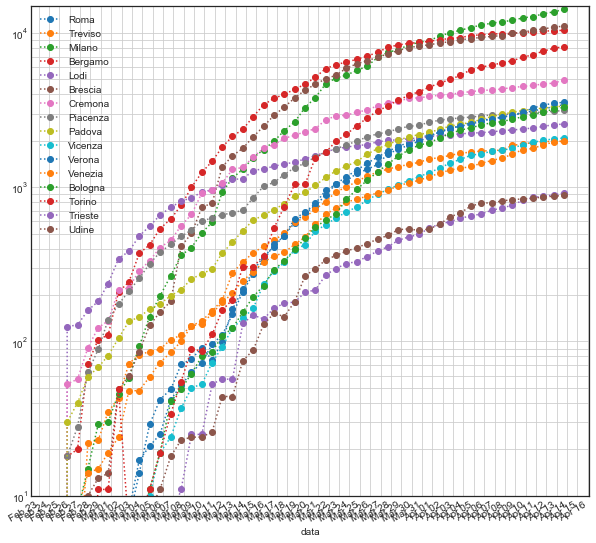

In [7]:
%matplotlib inline
#%matplotlib 
#plt.rcParams['figure.figsize'] = [10, 10]

plt.close('all')
mpl.style.use('seaborn-white')
fig, ax = plt.subplots( figsize=(10, 10))




lista = ['Roma', 'Treviso']
lista += [ 'Milano', 'Bergamo', 'Lodi', 'Brescia', 'Cremona', 'Piacenza']
lista += [ 'Padova', 'Vicenza', 'Verona', 'Venezia' ]
lista.append('Bologna')
lista.append('Torino')
lista.append('Trieste')
lista.append('Udine')
for name in lista:
    ax = dati[dati['denominazione_provincia'] == name]['totale_casi'].plot(marker='o',
                                                                           linestyle=':',
                                                                           label=name)
ax.legend()
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
#ax.set_yticks([10, 20, 40, 60, 80, 100, 120, 500])
#ax.get_yaxis().set_major_formatter(mpl.ticker.ScalarFormatter())


plt.ylim(bottom=10)
plt.yscale('log')
plt.grid(True, 'both')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in less


(-3, 33)

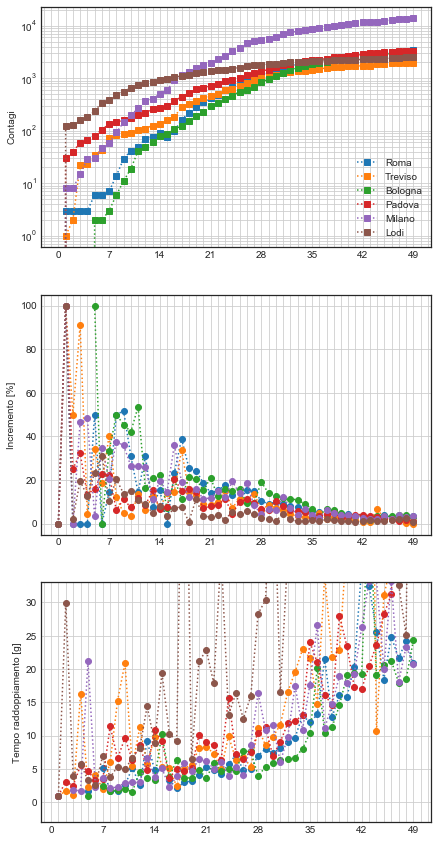

In [8]:
%matplotlib inline
#%matplotlib 
plt.rcParams['figure.figsize'] = [7, 15]

# ln(2)/(d ln N/dt)

plt.close('all')
fig, ax = plt.subplots(3,1)

lista = ['Roma', 'Treviso']
#lista += [ 'Milano', 'Bergamo', 'Lodi', 'Brescia', 'Cremona', 'Piacenza']
#lista += [ 'Padova', 'Vicenza', 'Verona', 'Venezia' ]
lista.append('Bologna')
#lista.append('Torino')
#lista.append('Trieste')
#lista.append('Udine')
lista.append('Padova')
lista.append('Milano')
lista.append('Lodi')

for name in lista:
    c = dati[dati['denominazione_provincia'] == name]['totale_casi'].to_numpy()
    x = np.arange(len(c))
    ax[0].plot(x,c,marker='s',linestyle=':',label=name)
    #y = np.log( c ); y[0] = 0 ; y[1:] = y[1:] - y[:-1] ; y = [ (log(2) / yy if yy>0 else float('nan')) for yy in y ]
    y = np.zeros( len(x) )
    y[1:] = ( c[1:] - c[:-1] ) / c[1:]
    #y =  y.clip(min=0)  
    y[ y<0 ] = 0.0
    ax[1].plot(x,100*y,marker='o',linestyle=':',label=name)
    yd = np.log( 1 + y )
    yd = log(2) / yd
    ax[2].plot(x,yd,marker='o',linestyle=':',label=name)    
ax[0].legend()
ax[0].set_ylabel('Contagi')
ax[0].set_yscale('log')
ax[1].set_ylabel('Incremento [%]')
ax[2].set_ylabel('Tempo raddoppiamento [g]')


#start = 0; step = 7
#xticks = dati[dati['sigla_provincia'] == 'RM'].index
#fxticks = [ datetime.strptime(date, '%m/%d/%y').strftime('%b %d') for date in list(xticks) ]
#plt.xticks(x[start::step], xticks[start::step])

start = 0; step = 7
#plt.xticks(x[start::step], x[start::step])
for i in range(3):
    ax[i].set_xticks(x[start::step])
    ax[i].xaxis.set_minor_locator(MultipleLocator())
    ax[i].grid(True, 'both')

ax[2].set_ylim([-3,33])
#plt.ylim(bottom=0, top=100)
#plt.yscale('linear')
#plt.grid()

Roma
Treviso
Padova
Milano
Bergamo
Brescia
Lodi


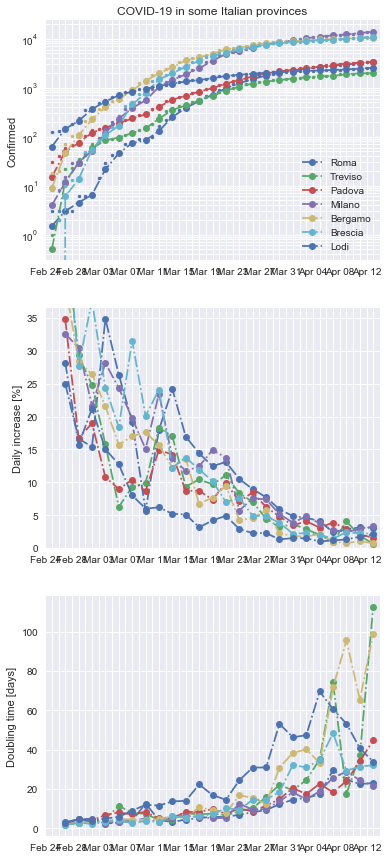

In [9]:
%matplotlib inline
#%matplotlib 
#plt.rcParams['figure.figsize'] = [8, 20]

url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-province/dpc-covid19-ita-province.csv'
dati = pd.read_csv(url, parse_dates=['data'], index_col=0)

plt.close('all')
mpl.style.use('seaborn')
fig, ax = plt.subplots( 3, 1, figsize=(6, 15))

start = 0; step = 2
#lista = ['Treviso']
#lista = ['Roma', 'Treviso']
lista = []
lista.append('Roma')
lista.append('Treviso')
lista.append('Padova')
#lista.append('Napoli')
#lista += [ 'Milano', 'Bergamo', 'Lodi', 'Brescia', 'Cremona', 'Piacenza']
#lista += [ 'Padova', 'Vicenza', 'Verona', 'Venezia' ]
#lista.append('Bologna')
#lista.append('Torino')
#lista.append('Trieste')
#lista.append('Udine')
lista.append('Milano')
lista.append('Bergamo')
lista.append('Brescia')
lista.append('Lodi')

for n, name in enumerate(lista):
    print(name)
    cn='C{}'.format(n)
    
    ct = dati[dati['denominazione_provincia'] == name]['totale_casi'].to_numpy()
    xt = np.arange(len(ct))
    ax[0].plot(xt,ct,marker='.',linestyle='',label='', color=cn) 
    
    c = ct[start+step-1::step]
    c2 = c**2
    for i in range(step-1):
        dc = ct[start+step-i-2::step][0:len(c)]
        c += dc
        c2 += dc**2
    c = c / step
    c2 = c2 / step
    cerr = ( c2 - c**2 )**0.5
    x = step * np.arange(len(c)) + step/2
    ax[0].set_ylabel('Confirmed')
    ax[0].set_yscale('log')
    ax[0].plot(x,c,marker='o',linestyle='-.',label=name, color=cn)
    #ax[0].errorbar(x,c,cerr,marker='s',linestyle=':',label=name)
    ax[0].legend()
    
    y = np.zeros( len(x) )
    y[1:] = ( c[1:] - c[:-1] ) / (step * c[1:])
    #y =  y.clip(min=0)  
    y[ y<0 ] = 0.0
    ax[1].plot( x[1:], 100*y[1:], marker='o',linestyle='-.',label=name)
    #ax[1].errorbar( x, 100*y, yerr=cerr/c, marker='o',linestyle=':',label=name)
    ax[1].set_ylabel('Daily increase [%]')
    ax[1].set_ylim(0)

    yd = np.log( 1 + y )
    yd[ yd>0 ] = log(2) / yd[ yd>0 ] 
    yd[ yd<=0 ] = float('nan') 
    ax[2].plot(x[1:],yd[1:],marker='o',linestyle='-.',label=name)    
    #ax[2].set_yscale('log')
    ax[2].set_ylabel('Doubling time [days]')
    #ax[2].set_xlabel('Giorni dal 24 Feb.')
    
    #y = np.log( c ); y[0] = 0 ; y[1:] = y[1:] - y[:-1] ; y = [ (log(2) / yy if yy>0 else float('nan')) for yy in y ]


index = dati[dati['sigla_provincia'] == 'RM'].index
rindex = range(len(index))
xticks = rindex
fxticks = [ date.strftime('%b %d') for date in list( index ) ]

step=4
for i in range(3):
    ax[i].set_xlim( 0, xt.max()+1)
    ax[i].set_xticks(xticks[::step])
    ax[i].set_xticklabels(fxticks[::step])
    #ax[i].set_xticklabels([])
    ax[i].set_xticks(xticks, minor=True)
    ax[i].grid(True, 'both')

ax[0].set_title('COVID-19 in some Italian provinces')
#ax[-1].set_xticklabels(fxticks)

#plt.ylim(bottom=0, top=100)
#plt.yscale('linear')
#plt.grid()

#plt.savefig('plot_ita_prov.pdf')
plt.savefig('plot_ita_prov.png')

# Dati regioni

---  totale_casi  ---
Lombardia
Veneto
Emilia Romagna
Liguria
Lazio
Campania
---  terapia_intensiva  ---
Lombardia
Veneto
Emilia Romagna
Liguria
Lazio
Campania
---  totale_ospedalizzati  ---
Lombardia
Veneto
Emilia Romagna
Liguria
Lazio
Campania
---  deceduti  ---
Lombardia
Veneto
Emilia Romagna
Liguria
Lazio
Campania


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in less


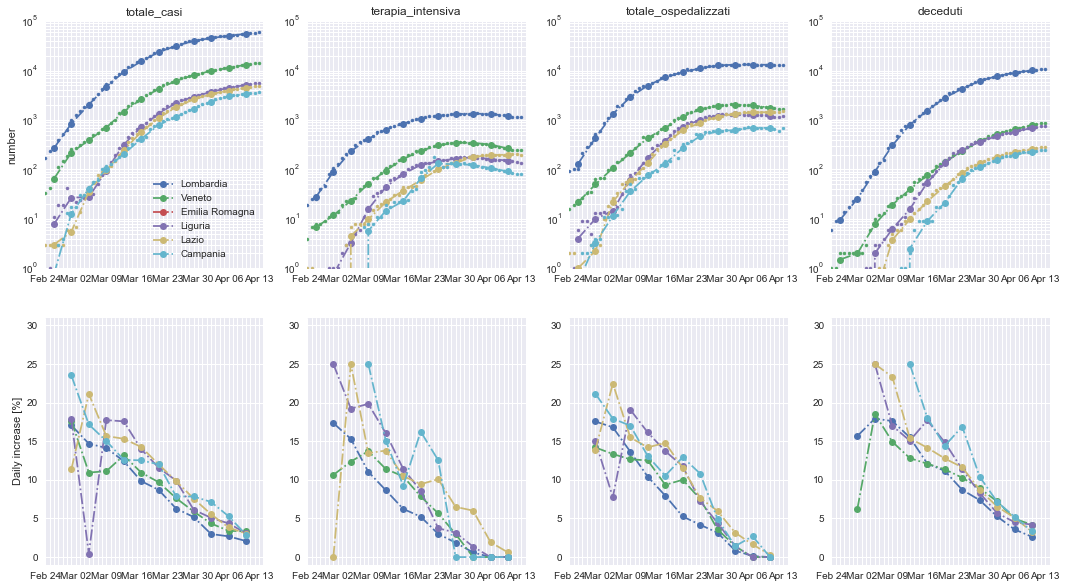

In [10]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
dati = pd.read_csv( url, parse_dates=['data'], index_col=0)

%matplotlib inline
#%matplotlib 
#plt.rcParams['figure.figsize'] = [8, 10]

campi = ['totale_casi']
#campi.append('totale_attualmente_positivi')
campi.append('terapia_intensiva')
campi.append('totale_ospedalizzati')
campi.append('deceduti')
#campi.append('dimessi_guariti')

plt.close('all')
mpl.style.use('seaborn')
fig, ax = plt.subplots( 2, len(campi), figsize=(18, 10))

start = 0; step = 4

lista = []
lista.append('Lombardia')
lista.append('Veneto')
lista.append('Emilia Romagna')
lista.append('Liguria')
lista.append('Lazio')
lista.append('Campania')


for i, campo in enumerate(campi):
    print('--- ',campo,' ---')
    for n, name in enumerate(lista):
        print(name)
        cn='C{}'.format(n)
    
        ct = dati[dati['denominazione_regione'] == name][campo].to_numpy()
        xt = np.arange(len(ct))
        ax[0,i].plot(xt,ct,marker='.',linestyle='',label='', color=cn) 
    
        c = ct[start+step-1::step]
        c2 = c**2
        for j in range(step-1):
            dc = ct[start+step-j-2::step][0:len(c)]
            c += dc
            c2 += dc**2
        c = c / step
        c2 = c2 / step
        cerr = ( c2 - c**2 )**0.5
        x = step * np.arange(len(c)) + step/2
        ax[0,0].set_ylabel('number')
        ax[0,i].set_yscale('log')
        ax[0,i].set_ylim(1,1e5)
        ax[0,i].plot(x,c,marker='o',linestyle='-.',label=name, color=cn)
        ax[0,i].set_title(campo)
    
        y = np.zeros( len(x) )
        y[1:] = ( c[1:] - c[:-1] ) / (step * c[1:])
        #y =  y.clip(min=0)  
        y[ y<0 ] = 0.0
        ax[1,i].plot( x[1:], 100*y[1:], marker='o',linestyle='-.',label=name)
        ax[1,0].set_ylabel('Daily increase [%]')
        ax[1,i].set_ylim(-1,31)

        #yd = np.log( 1 + y )
        #yd[ yd>0 ] = log(2) / yd[ yd>0 ] 
        #yd[ yd<=0 ] = float('nan') 
        #ax[2,i].plot(x[1:],yd[1:],marker='o',linestyle='-.',label=name)    
        #ax[2,0].set_ylabel('Doubling time [days]')
        #ax[2,i].set_ylim(-1,15)


    
    #y = np.log( c ); y[0] = 0 ; y[1:] = y[1:] - y[:-1] ; y = [ (log(2) / yy if yy>0 else float('nan')) for yy in y ]


index = dati[dati['denominazione_regione'] == lista[0] ].index
rindex = range(len(index))
xticks = rindex
#print(xticks)
fxticks = [ date.strftime('%b %d') for date in list( index ) ]
#print(fxticks)
#plt.xticks(x[start::step], xticks[start::step])

#plt.xticks(x[start::step], x[start::step])
step=7
for i in range(2):
    for j in range(len(campi)):
        ax[i,j].set_xlim( 0, xt.max()+1)
        ax[i,j].set_xticks(xticks[::step])
        ax[i,j].set_xticklabels(fxticks[::step])
        ax[i,j].set_xticks(xticks, minor=True)
        ax[i,j].grid(True, 'both')

ax[0,0].legend()

#plt.savefig('plot_ita_reg.pdf')
plt.savefig('plot_ita_reg.png')

---  totale_casi  ---
Lombardia
Veneto
Emilia-Romagna
Liguria
Lazio
Campania
---  deceduti  ---
Lombardia
Veneto
Emilia-Romagna
Liguria
Lazio
Campania
---  dimessi_guariti  ---
Lombardia
Veneto
Emilia-Romagna
Liguria
Lazio
Campania


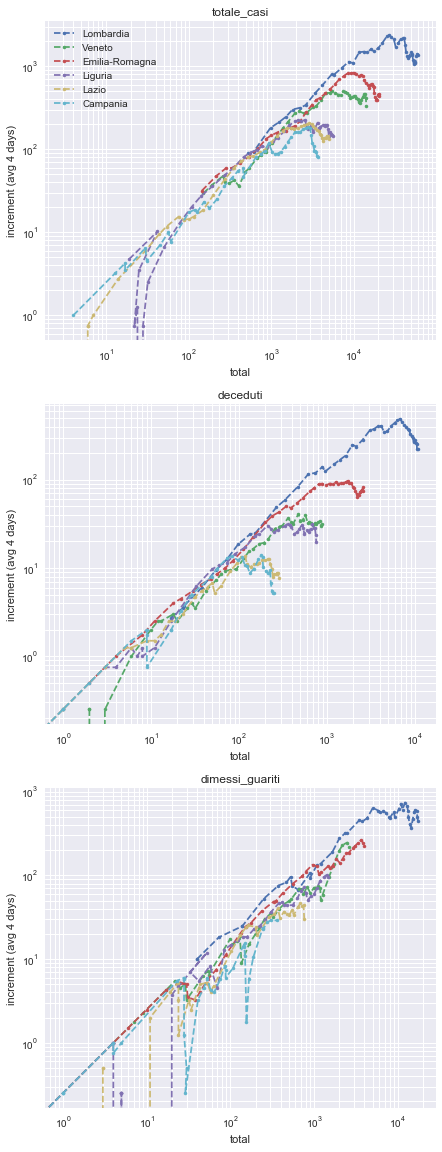

In [11]:
url = 'https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-regioni/dpc-covid19-ita-regioni.csv'
dati = pd.read_csv( url, parse_dates=['data'], index_col=0)

%matplotlib inline
#%matplotlib 
#plt.rcParams['figure.figsize'] = [8, 10]

campi = ['totale_casi']
#campi.append('terapia_intensiva')
#campi.append('totale_ospedalizzati')
campi.append('deceduti')
campi.append('dimessi_guariti')

lista = []
lista.append('Lombardia')
lista.append('Veneto')
lista.append('Emilia-Romagna')
lista.append('Liguria')
lista.append('Lazio')
lista.append('Campania')

plt.close('all')
mpl.style.use('seaborn')
fig, ax = plt.subplots( len(campi), 1, figsize=(7, 20))

start = 0; step = 4

for i, campo in enumerate(campi):
    print('--- ',campo,' ---')
    for n, name in enumerate(lista):
        print(name)
        cn='C{}'.format(n)
    
        ct = dati[dati['denominazione_regione'] == name][campo].to_numpy()
        xt = np.arange(len(ct))
        dc = ct[1:] - ct[:-1]
        dc = np.convolve(dc, np.ones((step,))/step, mode='valid')
        ax[i].plot( ct[step:], dc, marker='.',linestyle='--',label=name, color=cn) 
    
        ax[i].set_xlabel( 'total' )
        ax[i].set_ylabel( 'increment (avg {} days)'.format(step) )
        ax[i].set_xscale('log')
        ax[i].set_yscale('log')
        #ax[i].set_ylim(1,1e5)
        #ax[i].plot(x,c,marker='o',linestyle='-.',label=name, color=cn)
        ax[i].set_title(campo)
        ax[i].grid(True, 'both')

ax[0].legend()

index = dati[dati['denominazione_regione'] == lista[0] ].index
rindex = range(len(index))
xticks = rindex
fxticks = [ date.strftime('%b %d') for date in list( index ) ]

plt.savefig('plot_ita_reg_status.png')